# PHÂN TÍCH DỮ LIỆU PHÒNG TRỌ - CATEGORICAL & MISSING DATA

## Mục tiêu:
1. Phân tích các cột phân loại (Categorical Columns) - bao gồm cả các cột tiện ích boolean
2. Phân tích dữ liệu thiếu (Missing Data)
3. Phân tích tin đăng thiếu thông tin tiện ích
4. Phân tích cột date theo tháng/năm

## Cấu trúc phân tích:
- **Task 1**: Categorical Columns Analysis
  - Phân tích cột location, street_name
  - Phân tích các cột tiện ích (boolean)
  - Value Distribution: Phân phối giá trị
  - Data Quality: Kiểm tra chất lượng dữ liệu
  
- **Task 2**: Date Analysis
  - Phân tích theo tháng
  - Phân tích theo năm
  - Xu hướng đăng tin theo thời gian
  
- **Task 3**: Missing Data Analysis
  - Overall Assessment: Đánh giá tổng quan
  - Per Column Strategy: Chiến lược xử lý từng cột
  
- **Task 4**: Utility Information Analysis
  - Tìm các tin đăng thiếu thông tin tiện ích
  - Đề xuất giải pháp xử lý

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style('whitegrid')

# Đọc dữ liệu
df = pd.read_csv("../Data/cleaned.csv")

# Chuyển đổi cột date sang datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print("="*60)
print("THÔNG TIN CƠ BẢN VỀ DATASET")
print("="*60)
print(f"Số lượng dòng: {len(df)}")
print(f"Số lượng cột: {len(df.columns)}")
print(f"\nDanh sách các cột:\n{list(df.columns)}")
print(f"\nKiểu dữ liệu:\n{df.dtypes}")

THÔNG TIN CƠ BẢN VỀ DATASET
Số lượng dòng: 24121
Số lượng cột: 20

Danh sách các cột:
['title', 'description', 'location', 'address', 'street_name', 'price', 'area', 'date', 'air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking', 'url']

Kiểu dữ liệu:
title                       object
description                 object
location                    object
address                     object
street_name                 object
price                      float64
area                       float64
date                datetime64[ns]
air_conditioning             int64
fridge                       int64
washing_machine              int64
mezzanine                    int64
kitchen                      int64
wardrobe                     int64
bed                          int64
balcony                      int64
elevator                     int64
free_time                    int64
parking                      int64


## Task 1: Phân tích các cột phân loại (Categorical Columns)

### A. Phân tích cột text (location, street_name)
**Quy trình:**
- Đếm số lượng giá trị duy nhất (Unique values)
- Liệt kê Top 10 giá trị xuất hiện nhiều nhất
- Vẽ biểu đồ để quan sát sự mất cân bằng
- Kiểm tra chất lượng: Missing, Inconsistencies, Rare categories

### B. Phân tích cột tiện ích (Boolean columns)
**Quy trình:**
- Đếm số lượng True/False cho mỗi tiện ích
- Tính tỷ lệ phần trăm có/không có
- Vẽ biểu đồ tổng hợp tất cả tiện ích
- Phân tích mối tương quan giữa các tiện ích


A. PHÂN TÍCH CÁC CỘT TEXT (Location, Street)

Các cột text cần phân tích: ['location', 'street_name']

location:
--- 1. Phân phối giá trị ---
- Số lượng giá trị duy nhất: 12787

- Top 10 giá trị phổ biến:
  1. Đường Cộng Hòa, Phường 13, Quận Tân Bình, Hồ Chí Minh: 138 (0.57%)
  2. Đường Bạch Đằng, Phường 2, Quận Tân Bình, Hồ Chí Minh: 96 (0.40%)
  3. Đường số 35CL, Phường Cát Lái, Quận 2, Hồ Chí Minh: 95 (0.39%)
  4. Đường Đặng Thuỳ Trâm, Phường 13, Quận Bình Thạnh, Hồ Chí Minh: 81 (0.34%)
  5. Đường Xô Viết Nghệ Tĩnh, Phường 25, Quận Bình Thạnh, Hồ Chí Minh: 74 (0.31%)
  6. Đường Nơ Trang Long, Phường 13, Quận Bình Thạnh, Hồ Chí Minh: 72 (0.30%)
  7. Phố Lê Trọng Tấn, Phường Tây Thạnh, Quận Tân Phú, Hồ Chí Minh: 72 (0.30%)
  8. Đường Trường Chinh, Phường 15, Quận Tân Bình, Hồ Chí Minh: 66 (0.27%)
  9. Phố Lý Thường Kiệt, Phường 14, Quận 10, Hồ Chí Minh: 66 (0.27%)
  10. Đường Dương Quảng Hàm, Phường 5, Quận Gò Vấp, Hồ Chí Minh: 64 (0.27%)

PHÂN TÍCH LOCATION

--- A. PHÂN TÍCH THEO TỈ

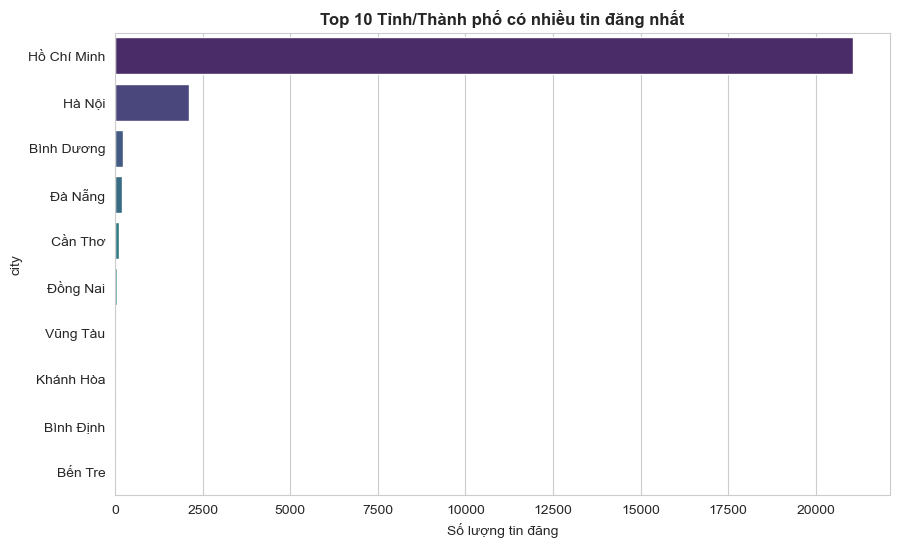


--- B. PHÂN TÍCH THEO QUẬN/HUYỆN (Cấp 2) ---

Phân tích chi tiết Quận/Huyện cho 3 thành phố lớn nhất: ['Hồ Chí Minh', 'Hà Nội', 'Bình Dương']

Hồ Chí Minh (Tổng: 21066 tin):
      1. Quận Bình Thạnh: 3102 tin (14.7%)
      2. Quận Tân Bình: 2828 tin (13.4%)
      3. Quận Gò Vấp: 2226 tin (10.6%)
      4. Quận Tân Phú: 1690 tin (8.0%)
      5. Quận 7: 1310 tin (6.2%)
      6. Quận 12: 1065 tin (5.1%)
      7. Quận 10: 1060 tin (5.0%)
      8. Quận Bình Tân: 1053 tin (5.0%)
      9. Quận 9: 1015 tin (4.8%)
      10. Quận Phú Nhuận: 872 tin (4.1%)

Hà Nội (Tổng: 2119 tin):
      1. Quận Cầu Giấy: 270 tin (12.7%)
      2. Quận Nam Từ Liêm: 255 tin (12.0%)
      3. Quận Hà Đông: 195 tin (9.2%)
      4. Quận Thanh Xuân: 190 tin (9.0%)
      5. Quận Bắc Từ Liêm: 186 tin (8.8%)
      6. Quận Hoàng Mai: 172 tin (8.1%)
      7. Quận Đống Đa: 163 tin (7.7%)
      8. Quận Hai Bà Trưng: 123 tin (5.8%)
      9. Huyện Thanh Trì: 120 tin (5.7%)
      10. Quận Tây Hồ: 106 tin (5.0%)

Bình Dương (Tổng:

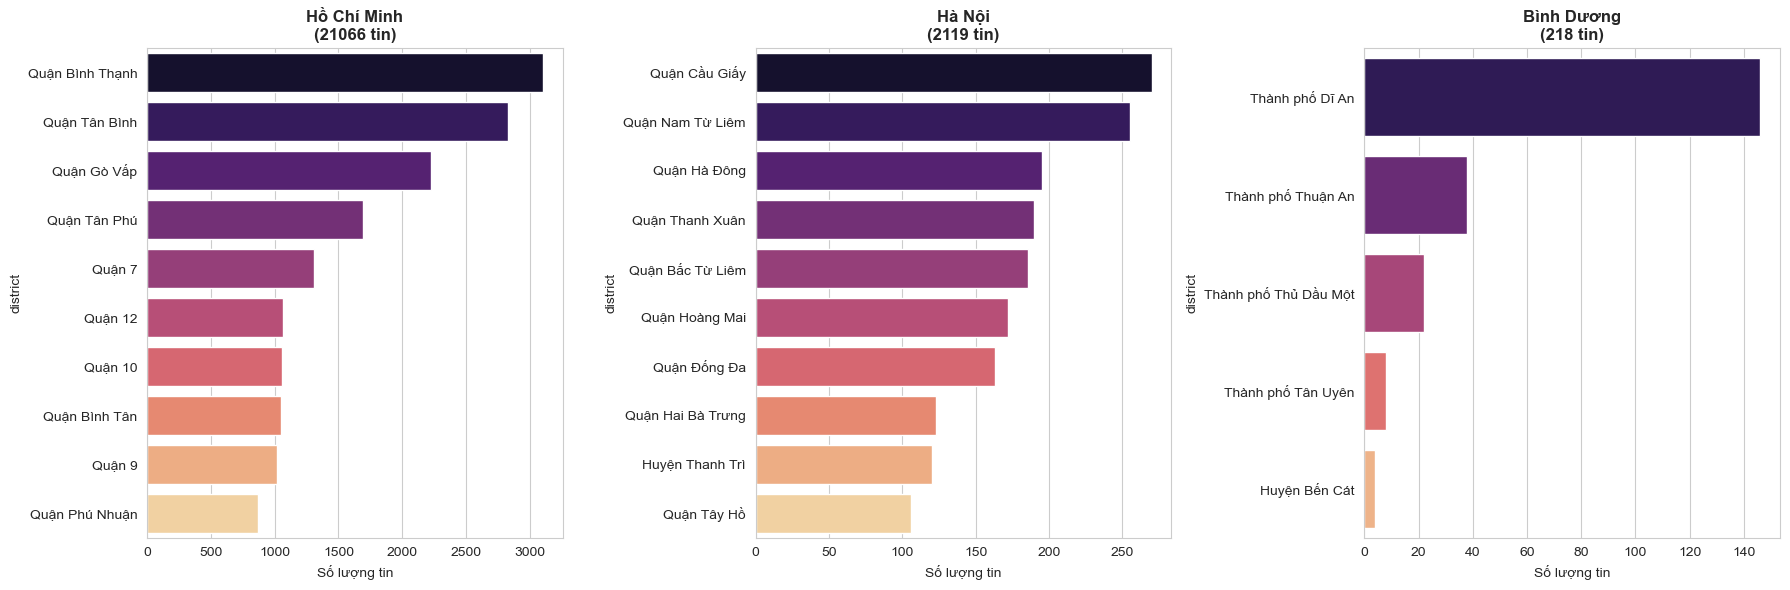



--- 2. Chất lượng dữ liệu ---
- Giá trị thiếu: 8
- Có sự không nhất quán về viết hoa/thường.

street_name:
--- 1. Phân phối giá trị ---
- Số lượng giá trị duy nhất: 2579

- Top 10 giá trị phổ biến:
  1. Số: 1012 (4.20%)
  2. Trường Chinh: 396 (1.64%)
  3. Xô Viết Nghệ Tĩnh: 359 (1.49%)
  4. Cách Mạng Tháng Tám: 297 (1.23%)
  5. Cộng Hòa: 285 (1.18%)
  6. Bạch Đằng: 251 (1.04%)
  7. UNKNOWN: 244 (1.01%)
  8. Lê Đức Thọ: 240 (0.99%)
  9. Lê Văn Sỹ: 238 (0.99%)
  10. Dương Quảng Hàm: 235 (0.97%)

(Bỏ qua biểu đồ vì có quá nhiều giá trị unique: 2579)

--- 2. Chất lượng dữ liệu ---
- Giá trị thiếu: 1

B. PHÂN TÍCH CÁC CỘT TIỆN ÍCH (BOOLEAN)

Các cột tiện ích có trong dữ liệu: ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']

BẢNG TỔNG HỢP CÁC TIỆN ÍCH:
        Tiện ích  Có (count)    Có (%)  Không (count)  Không (%)
        elevator       23770 98.544836            351   1.455164
       mezzanine   

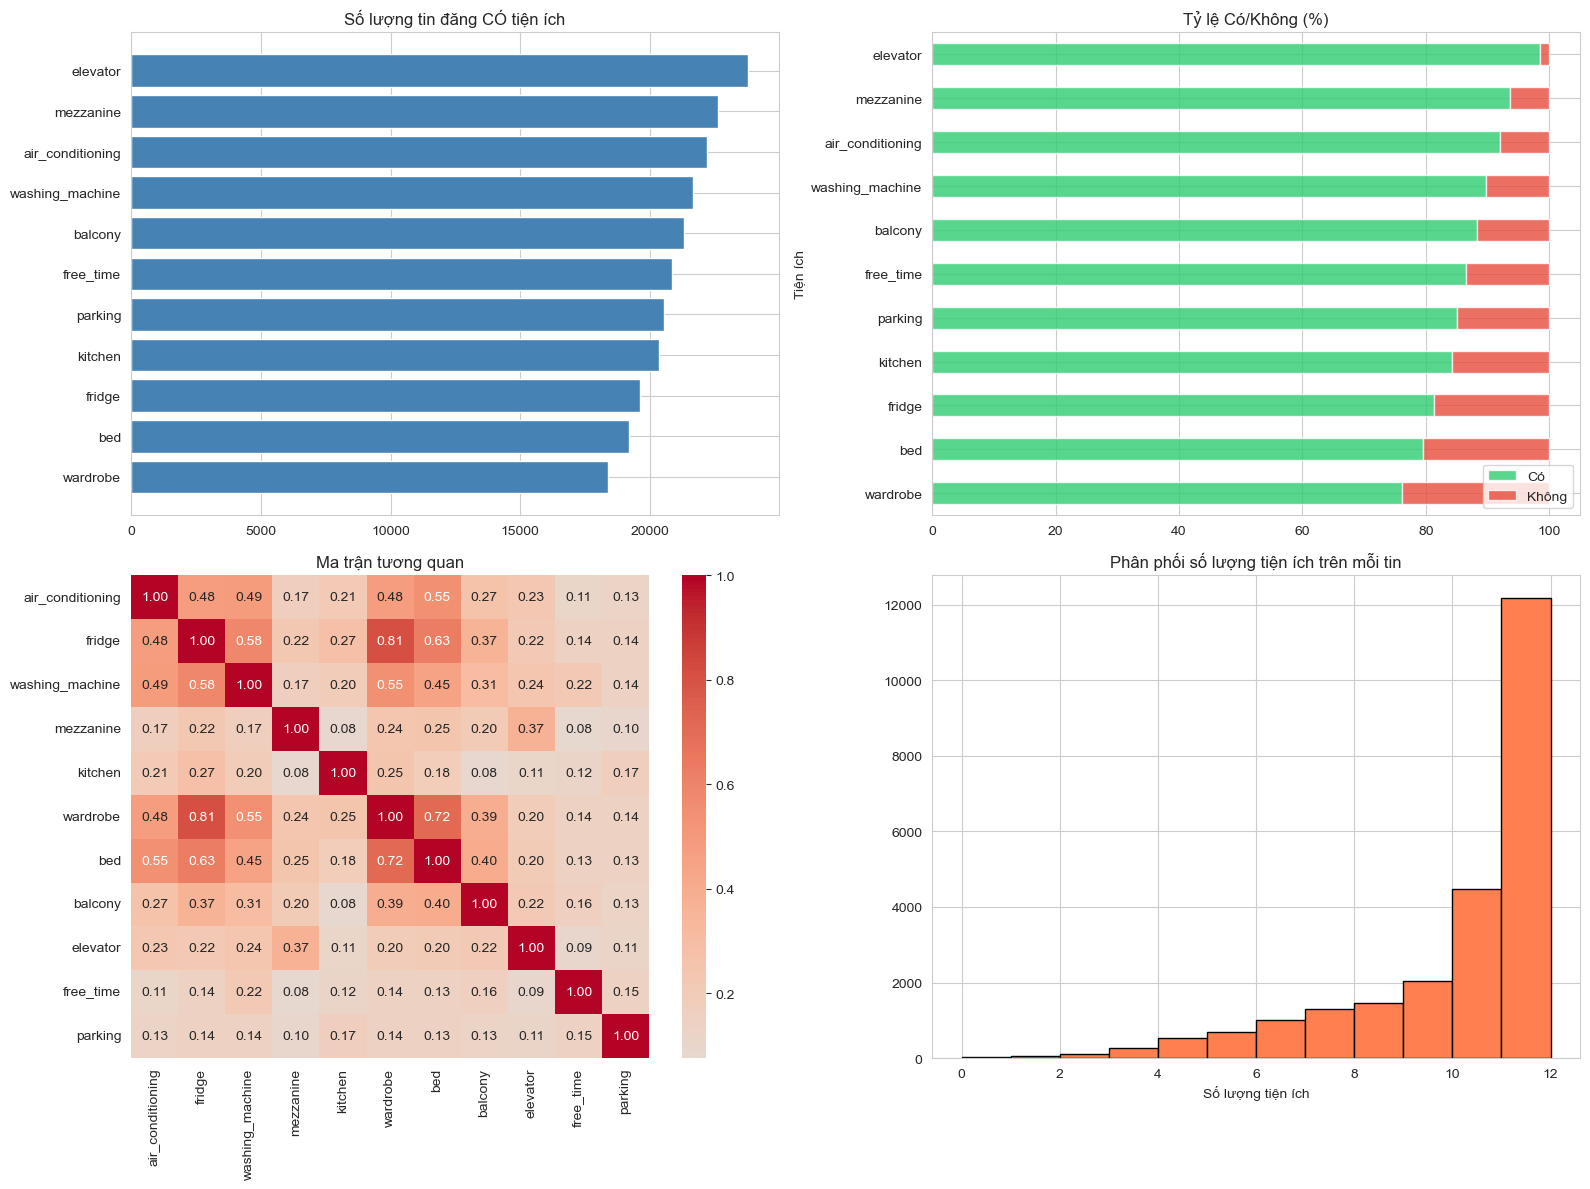

In [3]:
print("\n" + "="*50)
print("A. PHÂN TÍCH CÁC CỘT TEXT (Location, Street)")
print("="*50)

# Lấy danh sách các cột phân loại
exclude_cols = ['url', 'description', 'title', 'address', 'city', 'district']
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col not in exclude_cols and col != 'date']

print(f"\nCác cột text cần phân tích: {list(cat_cols)}")

for col in cat_cols:
    print(f"\n{col}:")
    print(f"--- 1. Phân phối giá trị ---")
    
    num_unique = df[col].nunique()
    print(f"- Số lượng giá trị duy nhất: {num_unique}")
    
    top_10 = df[col].value_counts().head(10)
    print(f"\n- Top 10 giá trị phổ biến:")
    for idx, (val, count) in enumerate(top_10.items(), 1):
        pct = (count / len(df)) * 100
        print(f"  {idx}. {val}: {count} ({pct:.2f}%)")
    
    if col == 'location':
        print("\n" + "="*50)
        print("PHÂN TÍCH LOCATION")
        print("="*50)
        
        def extract_location_smart(loc):
            loc = str(loc)
            city = 'Unknown'
            district = 'Unknown'
            
            if ' - ' in loc:
                parts = loc.split(' - ')
                city = parts[-1].strip()
                district = parts[0].strip()
            elif ',' in loc:
                parts = loc.split(',')
                city = parts[-1].strip()
                if len(parts) >= 2:
                    district = parts[-2].strip()
            else:
                city = loc.strip()
                
            return pd.Series([city, district])

        df[['city', 'district']] = df[col].apply(extract_location_smart)
        
        print("\n--- A. PHÂN TÍCH THEO TỈNH/THÀNH PHỐ ---")
        city_counts = df['city'].value_counts()
        
        top_10_cities = city_counts.head(10)
        print(f"\nTop 10 Tỉnh/Thành phố có nhiều tin đăng nhất:")
        for idx, (city, count) in enumerate(top_10_cities.items(), 1):
            pct = (count / len(df)) * 100
            print(f"  {idx}. {city}: {count} tin ({pct:.2f}%)")
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
        plt.xlabel('Số lượng tin đăng')
        plt.title('Top 10 Tỉnh/Thành phố có nhiều tin đăng nhất', fontweight='bold')
        plt.show()
        
        print("\n--- B. PHÂN TÍCH THEO QUẬN/HUYỆN (Cấp 2) ---")
        
        top_3_cities = city_counts.head(3).index
        
        print(f"\nPhân tích chi tiết Quận/Huyện cho 3 thành phố lớn nhất: {list(top_3_cities)}")
        
        n_cities = len(top_3_cities)
        if n_cities > 0:
            fig, axes = plt.subplots(1, n_cities, figsize=(6 * n_cities, 6))
            if n_cities == 1: axes = [axes]
            
            for idx, (city, ax) in enumerate(zip(top_3_cities, axes)):
                city_df = df[df['city'] == city]
                district_counts = city_df['district'].value_counts().head(10)
                
                print(f"\n{city} (Tổng: {len(city_df)} tin):")
                for i, (district, count) in enumerate(district_counts.items(), 1):
                    pct = (count / len(city_df)) * 100
                    print(f"      {i}. {district}: {count} tin ({pct:.1f}%)")
                
                sns.barplot(x=district_counts.values, y=district_counts.index, ax=ax, palette='magma')
                ax.set_title(f'{city}\n({len(city_df)} tin)', fontweight='bold')
                ax.set_xlabel('Số lượng tin')
            
            plt.tight_layout()
            plt.show()

        print("\n" + "="*50)
    
    if col != 'location':
        val_percent = df[col].value_counts(normalize=True) * 100
        if val_percent.iloc[0] > 90:
            print(f"\n[CẢNH BÁO] Dữ liệu mất cân bằng nghiêm trọng!")
            print(f"  Giá trị '{val_percent.index[0]}' chiếm {val_percent.iloc[0]:.2f}%")

        if num_unique <= 20:
            plt.figure(figsize=(12, 6))
            value_counts = df[col].value_counts().head(15)
            sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
            plt.title(f'Phân phối của {col}', fontsize=14, fontweight='bold')
            plt.xlabel('Số lượng')
            plt.tight_layout()
            plt.show()
        else:
            print(f"\n(Bỏ qua biểu đồ vì có quá nhiều giá trị unique: {num_unique})")

    print(f"\n--- 2. Chất lượng dữ liệu ---")
    missing_count = df[col].isnull().sum()
    print(f"- Giá trị thiếu: {missing_count}")
    
    if df[col].dtype == 'object':
        lower_unique = df[col].astype(str).str.lower().str.strip().nunique()
        if lower_unique < num_unique:
            print(f"- Có sự không nhất quán về viết hoa/thường.")

print("\n" + "="*50)
print("B. PHÂN TÍCH CÁC CỘT TIỆN ÍCH (BOOLEAN)")
print("="*50)

utility_cols = ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 
                'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 
                'free_time', 'parking']

utility_cols = [c for c in utility_cols if c in df.columns]
print(f"\nCác cột tiện ích có trong dữ liệu: {utility_cols}")

utility_summary = pd.DataFrame()

for col in utility_cols:
    value_counts = df[col].value_counts()
    total = len(df)
    
    count_true = df[col].sum()
    count_false = total - count_true
    pct_true = (count_true / total) * 100
    pct_false = (count_false / total) * 100
    
    utility_summary = pd.concat([utility_summary, pd.DataFrame({
        'Tiện ích': [col],
        'Có (count)': [count_true],
        'Có (%)': [pct_true],
        'Không (count)': [count_false],
        'Không (%)': [pct_false]
    })], ignore_index=True)

print("\nBẢNG TỔNG HỢP CÁC TIỆN ÍCH:")
print(utility_summary.sort_values('Có (%)', ascending=False).to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Biểu đồ số lượng
utility_summary_sorted = utility_summary.sort_values('Có (count)', ascending=True)
axes[0, 0].barh(utility_summary_sorted['Tiện ích'], utility_summary_sorted['Có (count)'], color='steelblue')
axes[0, 0].set_title('Số lượng tin đăng CÓ tiện ích')

# 2. Biểu đồ tỷ lệ %
utility_pct = utility_summary[['Tiện ích', 'Có (%)', 'Không (%)']].set_index('Tiện ích').sort_values('Có (%)')
utility_pct.plot(kind='barh', stacked=True, ax=axes[0, 1], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0, 1].set_title('Tỷ lệ Có/Không (%)')
axes[0, 1].legend(['Có', 'Không'], loc='lower right')

# 3. Heatmap tương quan
if len(utility_cols) > 1:
    corr_matrix = df[utility_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 0])
    axes[1, 0].set_title('Ma trận tương quan')

# 4. Histogram số lượng tiện ích
df['total_utilities'] = df[utility_cols].sum(axis=1)
axes[1, 1].hist(df['total_utilities'], bins=range(0, 13), color='coral', edgecolor='black')
axes[1, 1].set_title('Phân phối số lượng tiện ích trên mỗi tin')
axes[1, 1].set_xlabel('Số lượng tiện ích')

plt.tight_layout()
plt.show()

## Task 2: Phân tích cột Date

### Quy trình phân tích:
**a. Phân tích theo Tháng:**
- Số lượng tin đăng mỗi tháng
- Xu hướng đăng tin theo tháng
- Tìm tháng có nhiều tin nhất/ít nhất

**b. Phân tích theo Năm:**
- Số lượng tin đăng mỗi năm
- Tăng trưởng qua các năm


TASK 2: PHÂN TÍCH CỘT DATE
Dữ liệu ngày tháng hợp lệ: 24113 / 24121 dòng

--- A. Phân tích theo NĂM ---
Số lượng tin đăng theo năm:
  2018: 1 tin (0.00%)
  2020: 3 tin (0.01%)
  2023: 103 tin (0.43%)
  2024: 12006 tin (49.79%)
  2025: 12000 tin (49.77%)

--- B. Phân tích theo THÁNG ---
Số lượng tin đăng theo tháng:
  Tháng 1 (Jan): 538 tin (2.23%)
  Tháng 2 (Feb): 1436 tin (5.96%)
  Tháng 3 (Mar): 2720 tin (11.28%)
  Tháng 4 (Apr): 2165 tin (8.98%)
  Tháng 5 (May): 2231 tin (9.25%)
  Tháng 6 (Jun): 2089 tin (8.66%)
  Tháng 7 (Jul): 2557 tin (10.60%)
  Tháng 8 (Aug): 2550 tin (10.58%)
  Tháng 9 (Sep): 1943 tin (8.06%)
  Tháng 10 (Oct): 2605 tin (10.80%)
  Tháng 11 (Nov): 2277 tin (9.44%)
  Tháng 12 (Dec): 1002 tin (4.16%)

--- C. Phân tích chi tiết theo NĂM-THÁNG ---
Top 5 tháng ít tin nhất:
  2018-06: 1 tin
  2020-03: 1 tin
  2020-04: 1 tin
  2020-07: 1 tin
  2023-05: 2 tin

Top 5 tháng nhiều tin nhất:
  2025-07: 1211 tin
  2025-08: 1599 tin
  2025-09: 1195 tin
  2025-10: 1439 tin
  2

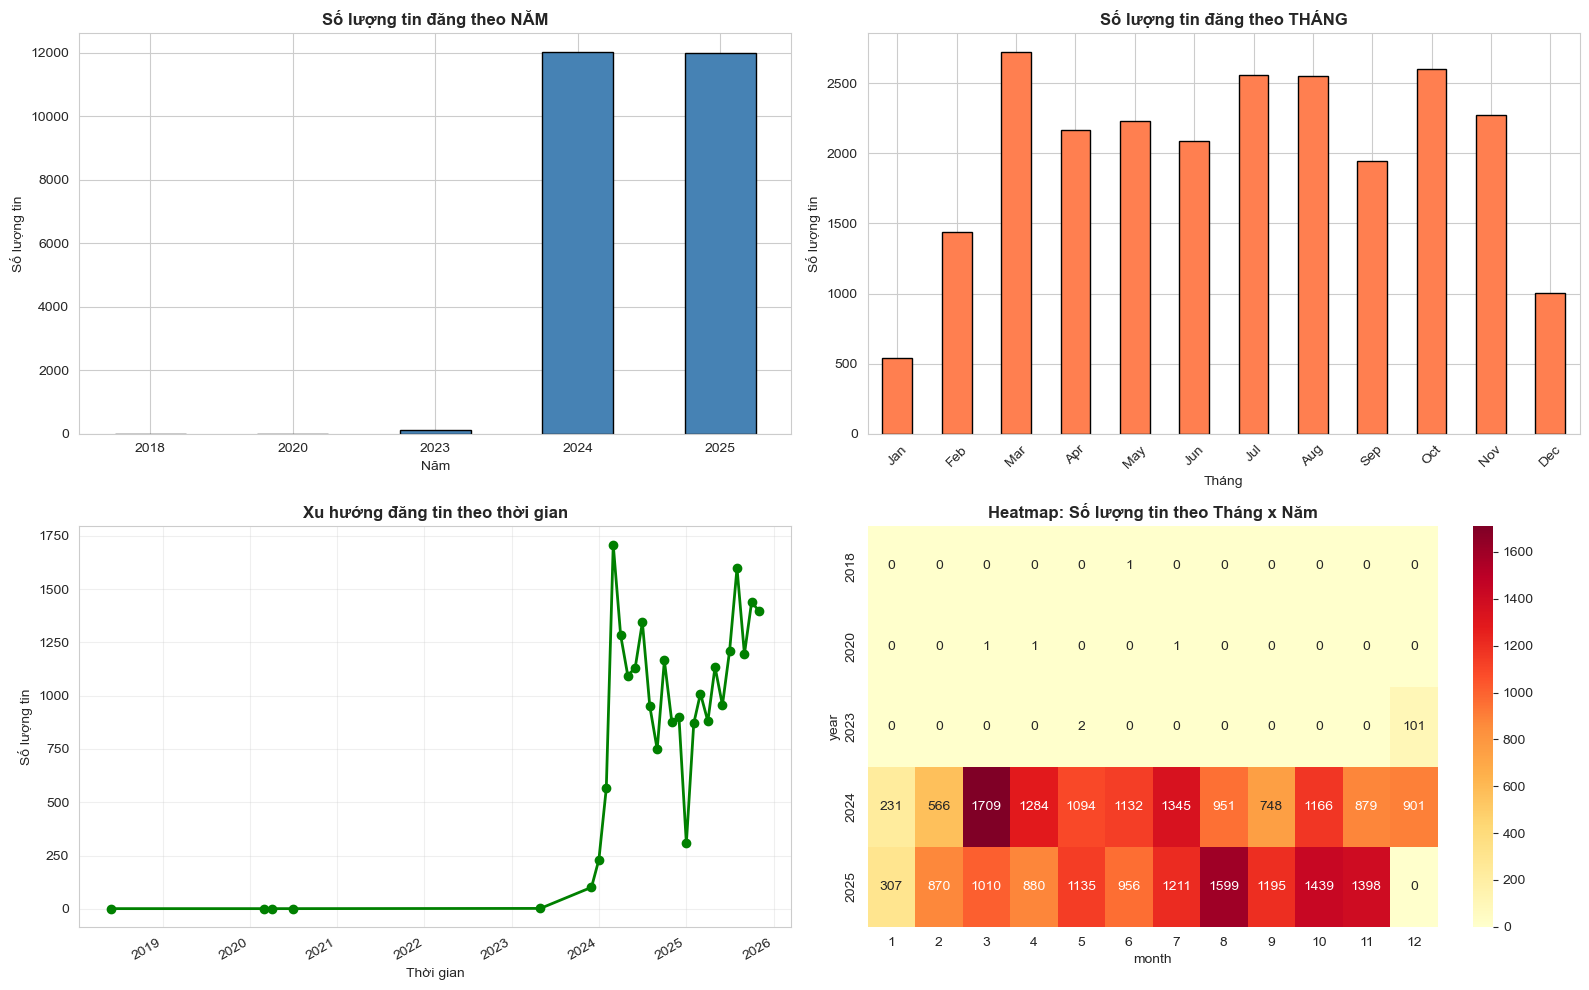


KẾT LUẬN PHÂN TÍCH THỜI GIAN
Tăng trưởng từ 2018 đến 2025: 1199900.00%
Tháng sôi động nhất: Tháng 3 - 2720 tin
Tháng ít hoạt động nhất: Tháng 1 - 538 tin


In [4]:
print("\n" + "="*60)
print("TASK 2: PHÂN TÍCH CỘT DATE")
print("="*60)

# 1. Chuẩn hóa cột Date
if 'date' in df.columns:
    # Chuyển sang định dạng datetime, lỗi sẽ biến thành NaT
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Lọc bỏ các dòng không có ngày tháng
    df_date = df.dropna(subset=['date']).copy()
    
    print(f"Dữ liệu ngày tháng hợp lệ: {len(df_date)} / {len(df)} dòng")

    # Trích xuất thông tin
    df_date['year'] = df_date['date'].dt.year
    df_date['month'] = df_date['date'].dt.month
    df_date['year_month'] = df_date['date'].dt.to_period('M')

    # A. Phân tích theo NĂM
    print("\n--- A. Phân tích theo NĂM ---")
    year_counts = df_date['year'].value_counts().sort_index()
    print(f"Số lượng tin đăng theo năm:")
    for year, count in year_counts.items():
        pct = (count / len(df_date)) * 100
        print(f"  {int(year)}: {count} tin ({pct:.2f}%)")

    # B. Phân tích theo THÁNG
    print("\n--- B. Phân tích theo THÁNG ---")
    month_counts = df_date['month'].value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    print(f"Số lượng tin đăng theo tháng:")
    for month, count in month_counts.items():
        pct = (count / len(df_date)) * 100
        print(f"  Tháng {int(month)} ({month_names[int(month)-1]}): {count} tin ({pct:.2f}%)")

    # C. Phân tích theo NĂM-THÁNG
    print("\n--- C. Phân tích chi tiết theo NĂM-THÁNG ---")
    year_month_counts = df_date['year_month'].value_counts().sort_index()
    
    print(f"Top 5 tháng ít tin nhất:")
    for ym, count in year_month_counts.head(5).items():
        print(f"  {ym}: {count} tin")

    print(f"\nTop 5 tháng nhiều tin nhất:")
    for ym, count in year_month_counts.tail(5).items():
        print(f"  {ym}: {count} tin")

    # Vẽ biểu đồ
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # 1. Biểu đồ năm
    year_counts.plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
    axes[0, 0].set_xlabel('Năm')
    axes[0, 0].set_ylabel('Số lượng tin')
    axes[0, 0].set_title('Số lượng tin đăng theo NĂM', fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=0)

    # 2. Biểu đồ tháng
    month_counts.plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black')
    axes[0, 1].set_xlabel('Tháng')
    axes[0, 1].set_ylabel('Số lượng tin')
    axes[0, 1].set_title('Số lượng tin đăng theo THÁNG', fontweight='bold')
    axes[0, 1].set_xticklabels([month_names[int(m)-1] for m in month_counts.index], rotation=45)

    # 3. Xu hướng thời gian (Line chart)
    # Convert period to timestamp for plotting compatibility
    year_month_counts.index = year_month_counts.index.to_timestamp()
    year_month_counts.plot(kind='line', ax=axes[1, 0], marker='o', color='green', linewidth=2)
    axes[1, 0].set_xlabel('Thời gian')
    axes[1, 0].set_ylabel('Số lượng tin')
    axes[1, 0].set_title('Xu hướng đăng tin theo thời gian', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Heatmap
    pivot_data = df_date.groupby(['year', 'month']).size().unstack(fill_value=0)
    sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1, 1])
    axes[1, 1].set_title('Heatmap: Số lượng tin theo Tháng x Năm', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Insights Text
    print("\n" + "="*50)
    print("KẾT LUẬN PHÂN TÍCH THỜI GIAN")
    print("="*50)

    if len(year_counts) > 1:
        year_growth = ((year_counts.iloc[-1] - year_counts.iloc[0]) / year_counts.iloc[0]) * 100
        print(f"Tăng trưởng từ {int(year_counts.index[0])} đến {int(year_counts.index[-1])}: {year_growth:.2f}%")

    most_active = month_counts.idxmax()
    least_active = month_counts.idxmin()
    print(f"Tháng sôi động nhất: Tháng {int(most_active)} - {month_counts.max()} tin")
    print(f"Tháng ít hoạt động nhất: Tháng {int(least_active)} - {month_counts.min()} tin")

else:
    print("Không tìm thấy cột 'date' trong dữ liệu.")

## Task 3: Phân tích dữ liệu thiếu (Missing Data)

### Quy trình phân tích:
**a. Overall Assessment (Đánh giá tổng quan):**
- Lập bảng tổng hợp: Tên cột, số lượng thiếu, phần trăm thiếu
- Visualize: Vẽ Heatmap để xem sự phân bố của dữ liệu thiếu

**b. Per Column Strategy (Chiến lược xử lý):**
- Thiếu > 50%: Cân nhắc xóa cột
- Thiếu < 5%: Có thể xóa dòng hoặc điền giá trị
- Thiếu 5-50%: Điền giá trị (Mean/Median/Mode) hoặc tạo nhóm "Unknown"


TASK 3: PHÂN TÍCH DỮ LIỆU THIẾU

Bảng thống kê dữ liệu thiếu:

             Số lượng thiếu  Tỷ lệ (%)
price                    59   0.244600
description               8   0.033166
location                  8   0.033166
area                      8   0.033166
date                      8   0.033166
street_name               1   0.004146


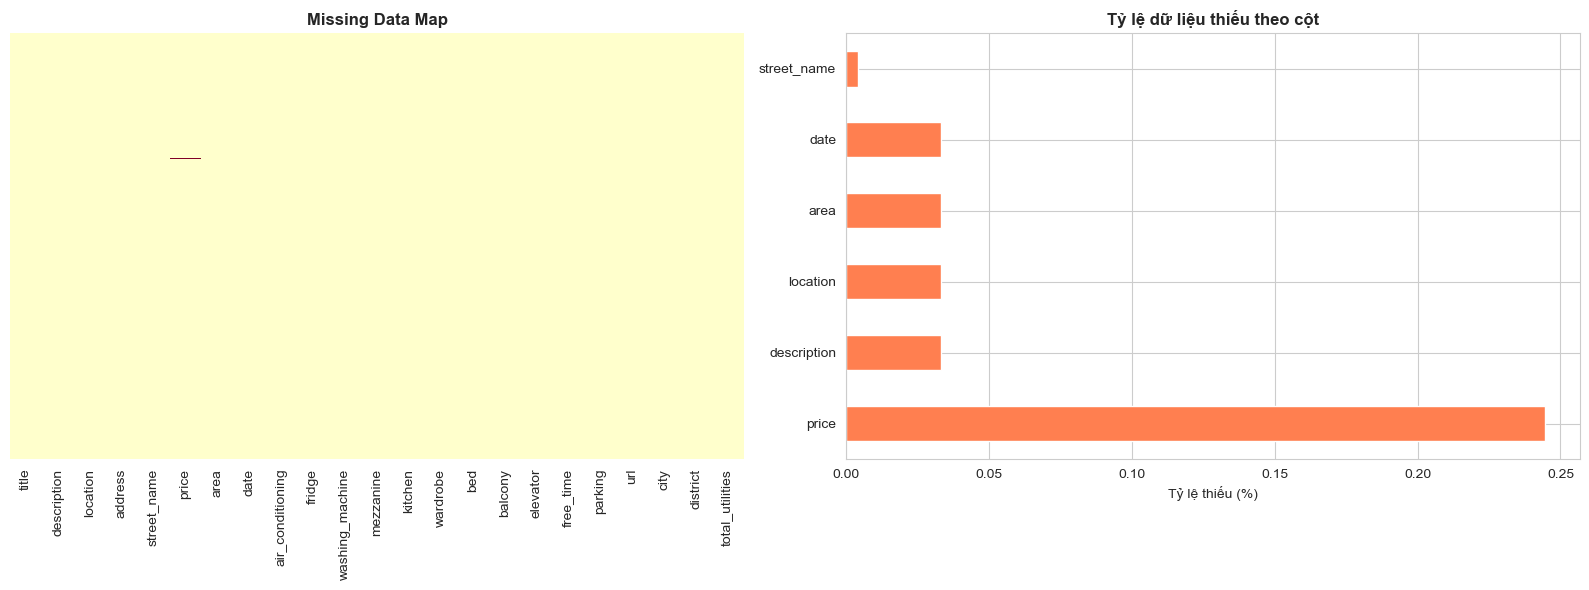


CHIẾN LƯỢC XỬ LÝ DỮ LIỆU THIẾU

Cột 'price' (59 giá trị thiếu - 0.24%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'description' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'location' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'area' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'date' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'street_name' (1 giá trị thiếu - 0.00%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset


In [5]:
print("\n" + "="*60)
print("TASK 3: PHÂN TÍCH DỮ LIỆU THIẾU")
print("="*60)

# A. Đánh giá tổng quan
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_table = pd.concat([missing_data, missing_percent], axis=1, 
                          keys=['Số lượng thiếu', 'Tỷ lệ (%)'])
missing_table = missing_table[missing_table['Số lượng thiếu'] > 0].sort_values('Tỷ lệ (%)', ascending=False)

if not missing_table.empty:
    print("\nBảng thống kê dữ liệu thiếu:\n")
    print(missing_table.to_string())
    
    # Vẽ biểu đồ missing data
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Heatmap
    sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd', 
                yticklabels=False, ax=axes[0])
    axes[0].set_title('Missing Data Map', 
                      fontsize=12, fontweight='bold')
    
    # Bar chart
    missing_table['Tỷ lệ (%)'].plot(kind='barh', ax=axes[1], color='coral')
    axes[1].set_xlabel('Tỷ lệ thiếu (%)')
    axes[1].set_title('Tỷ lệ dữ liệu thiếu theo cột', 
                      fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # B. Chiến lược xử lý cho từng cột
    print("\n" + "="*60)
    print("CHIẾN LƯỢC XỬ LÝ DỮ LIỆU THIẾU")
    print("="*60)
    
    for col in missing_table.index:
        pct = missing_table.loc[col, 'Tỷ lệ (%)']
        count = missing_table.loc[col, 'Số lượng thiếu']
        
        print(f"\nCột '{col}' ({count} giá trị thiếu - {pct:.2f}%):")
        
        if pct > 50:
            print("  ĐỀ XUẤT: XÓA CỘT (Drop column)")
            print("  -> Thiếu quá nhiều thông tin, khó khôi phục")
        elif pct < 5:
            print("  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị")
            print("  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset")
        else:
            print("  ĐỀ XUẤT: ĐIỀN GIÁ TRỊ (Imputation)")
            if df[col].dtype in ['int64', 'float64']:
                print("  -> Biến số: Điền bằng Mean/Median/KNN")
            else:
                print("  -> Biến phân loại: Điền Mode hoặc tạo nhóm 'Unknown'")
else:
    print("\nDataset hoàn hảo! Không có giá trị nào bị thiếu.")

## Task 4: Phân tích tin đăng thiếu thông tin tiện ích

### Mục đích:
Kiểm tra số lượng bản ghi mà TẤT CẢ các cột tiện ích đều = False/0

### Nguyên nhân có thể:
- Người đăng không tích chọn tiện ích khi đăng bài
- Thông tin tiện ích được viết trong phần mô tả (description)

### Hành động đề xuất:
- Nếu tỷ lệ > 20%: Cần Text Mining trên cột 'description'
- Nếu tỷ lệ 10-20%: Xem xét xử lý hoặc giữ nguyên
- Nếu tỷ lệ < 10%: Chấp nhận được


TASK 4: PHÂN TÍCH TIN ĐĂNG THIẾU THÔNG TIN TIỆN ÍCH

KẾT QUẢ TỔNG QUAN:
- Tổng số tin đăng: 24121
- Tin không có tiện ích nào: 19
- Tỷ lệ: 0.08%

Phân phối từng tiện ích:
  elevator: 23770 (98.54%)
  mezzanine: 22603 (93.71%)
  air_conditioning: 22190 (91.99%)
  washing_machine: 21658 (89.79%)
  balcony: 21300 (88.30%)
  free_time: 20856 (86.46%)
  parking: 20534 (85.13%)
  kitchen: 20327 (84.27%)
  fridge: 19626 (81.36%)
  bed: 19203 (79.61%)
  wardrobe: 18365 (76.14%)


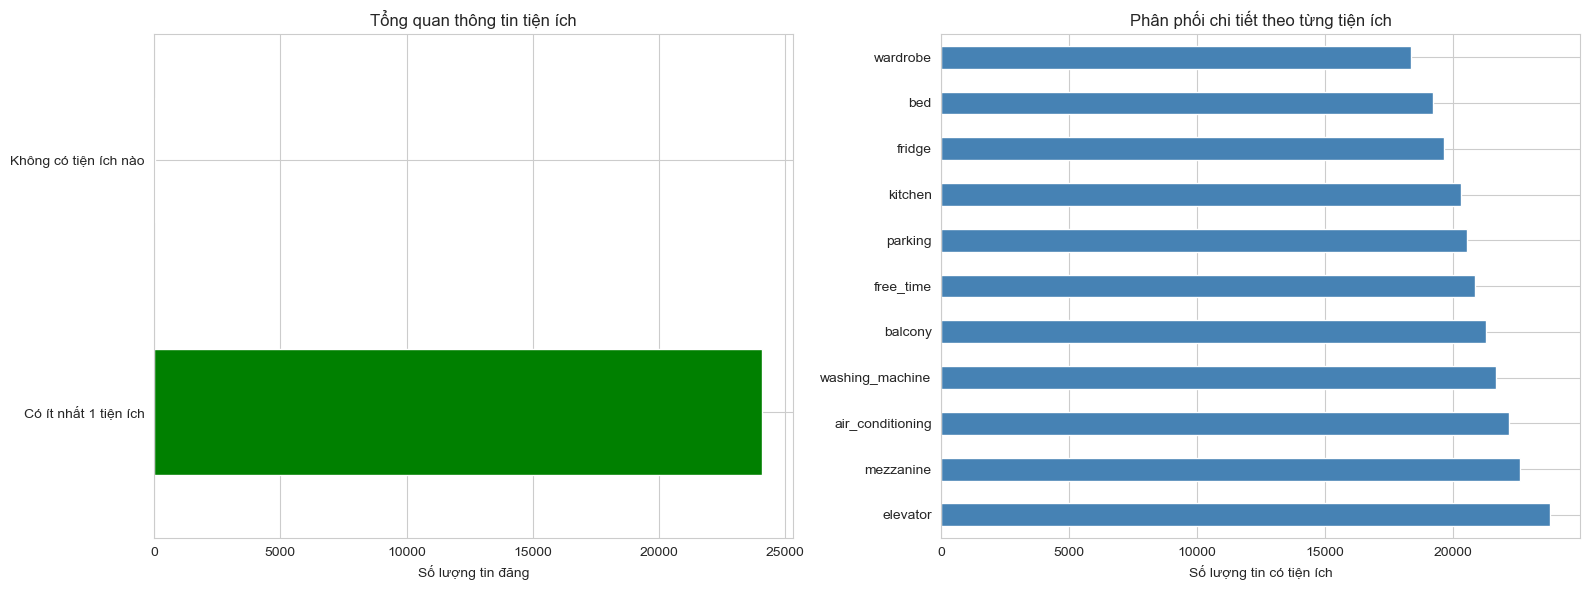


ĐÁNH GIÁ VÀ ĐỀ XUẤT

Tỷ lệ chấp nhận được!
- Dữ liệu khá đầy đủ về thông tin tiện ích

Mẫu 5 tin đăng không có tiện ích:
                                                                                title                                                               location  price  area  air_conditioning  fridge  washing_machine  mezzanine  kitchen  wardrobe  bed  balcony  elevator  free_time  parking
2684                                                          Rất tiếc, có lỗi xảy ra                                                                    NaN    NaN   NaN                 0       0                0          0        0         0    0        0         0          0        0
2994                                              Connection timed out Error code 522                                                                    NaN    NaN   NaN                 0       0                0          0        0         0    0        0         0          0        0
3021             

In [6]:
print("\n" + "="*60)
print("TASK 4: PHÂN TÍCH TIN ĐĂNG THIẾU THÔNG TIN TIỆN ÍCH")
print("="*60)

utility_cols = ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 
                'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 
                'free_time', 'parking']

# Lọc tin không có tiện ích nào
no_utilities_df = df[df[utility_cols].sum(axis=1) == 0]

count_no_utils = len(no_utilities_df)
total_rows = len(df)
percent_no_utils = (count_no_utils / total_rows) * 100

print(f"\nKẾT QUẢ TỔNG QUAN:")
print(f"- Tổng số tin đăng: {total_rows}")
print(f"- Tin không có tiện ích nào: {count_no_utils}")
print(f"- Tỷ lệ: {percent_no_utils:.2f}%")

print(f"\nPhân phối từng tiện ích:")
utility_stats = df[utility_cols].sum().sort_values(ascending=False)
for util, count in utility_stats.items():
    pct = (count / total_rows) * 100
    print(f"  {util}: {count} ({pct:.2f}%)")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

utilities_summary = pd.DataFrame({
    'Có ít nhất 1 tiện ích': [total_rows - count_no_utils],
    'Không có tiện ích nào': [count_no_utils]
}).T

utilities_summary.plot(kind='barh', ax=axes[0], legend=False, color=['green', 'red'])
axes[0].set_xlabel('Số lượng tin đăng')
axes[0].set_title('Tổng quan thông tin tiện ích')

utility_stats.plot(kind='barh', ax=axes[1], color='steelblue')
axes[1].set_xlabel('Số lượng tin có tiện ích')
axes[1].set_title('Phân phối chi tiết theo từng tiện ích')

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("ĐÁNH GIÁ VÀ ĐỀ XUẤT")
print("="*60)

if percent_no_utils > 20:
    print("\nTỶ LỆ TIN THIẾU TIỆN ÍCH CAO!")
    print("\nĐỀ XUẤT:")
    print("1. Sử dụng Text Mining để trích xuất thông tin từ cột 'description'")
    print("2. Áp dụng NLP để tìm từ khóa:")
    print("   - 'máy lạnh', 'điều hòa' -> air_conditioning")
    print("   - 'tủ lạnh' -> fridge")
    print("   - 'máy giặt' -> washing_machine")
    print("   - 'gác', 'gác lửng' -> mezzanine")
elif percent_no_utils > 10:
    print("\nTỷ lệ trung bình, nên xử lý:")
    print("- Kiểm tra mô tả (description) để điền thông tin")
    print("- Hoặc có thể giữ nguyên nếu mục đích phân tích chấp nhận được")
else:
    print("\nTỷ lệ chấp nhận được!")
    print("- Dữ liệu khá đầy đủ về thông tin tiện ích")

if count_no_utils > 0:
    print(f"\nMẫu 5 tin đăng không có tiện ích:")
    sample_cols = ['title', 'location', 'price', 'area'] + utility_cols
    print(no_utilities_df[sample_cols].head().to_string())

print("\n" + "="*60)
print("KẾT THÚC PHÂN TÍCH")
print("="*60)